In [1]:
from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

In [2]:

def detect_weight_region(image):
    image = cv2.resize(image, (1200,1200))
    credentials = ApiKeyCredentials(in_headers = {"Prediction-Key":"bf595a2cb1854d988a1f9d26834cd4e2"})
    predictor =  CustomVisionPredictionClient("https://pankaj.cognitiveservices.azure.com/", credentials)
    cv2.imwrite('detect_weight_region.png', image)
    digit = ""
    with open("detect_weight_region.png", mode ='rb') as captured_image:
        # print("load digit image... and predict ")
        results = predictor.detect_image("de960dda-1a51-444e-9fe9-84f8fbc4eff1", "Iteration2", captured_image)
        maxm_percentage = 0.0
        ans = []
        for prediction in results.predictions:
            if(prediction.probability > maxm_percentage):
                maxm_percentage = prediction.probability
                ans = [prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height]
            print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))
    image_shape = image.shape
    x = int(ans[0]*image_shape[0])
    y = int(ans[1]*image_shape[1])
    w = int(ans[2]*image_shape[0])
    h = int(ans[3]*image_shape[1])
    roi = image[y:y+h, x:x+w]
    return roi


def get_digits(output):
    digit_dict ={"Zero":0, "One":1, "Two":2, "Three":3, "Four":4, "Five":5, "Six":6, "Seven":7, "Eight":8, "Nine":9 }
    no_of_digit =len(collection_of_image)
    weight = 0
    factor = 1
    for i,box in enumerate(output):
        number = box[-2]
        weight+=digit_dict[number]*factor
        factor*=10
    
    weight = weight*0.001
        
    return weight
    return 0.252

	roi: 99.96% bbox.left = 0.41, bbox.top = 0.75, bbox.width = 0.17, bbox.height = 0.08
	roi: 10.56% bbox.left = 0.55, bbox.top = 0.90, bbox.width = 0.15, bbox.height = 0.06
	roi: 6.59% bbox.left = 0.35, bbox.top = 0.00, bbox.width = 0.08, bbox.height = 0.02
	roi: 1.71% bbox.left = 0.99, bbox.top = 0.95, bbox.width = 0.01, bbox.height = 0.05


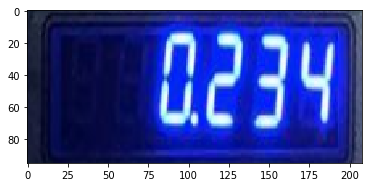

In [15]:
image = cv2.imread("prediciton7.jpeg")
roi = detect_weight_region(image)
plt.imshow(roi)

In [16]:
print(roi.shape)

(95, 208, 3)


In [17]:
roi = cv2.resize(roi,(200,100))

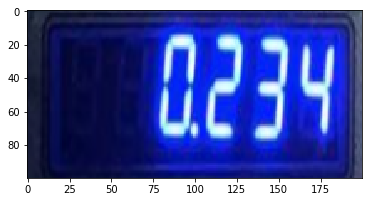

In [18]:
plt.imshow(roi)

In [ ]:
'''1. region x =200 180/6 = 30 35'''

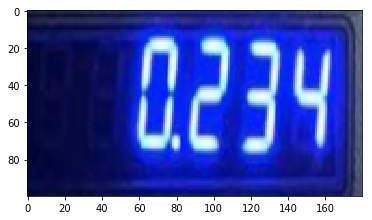

In [19]:
plt.imshow(roi[:,20:])

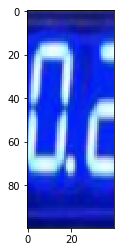

In [20]:
plt.imshow(roi[:, 80:120])

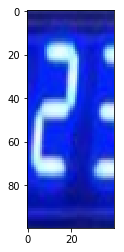

In [21]:
plt.imshow(roi[:, 105:145])

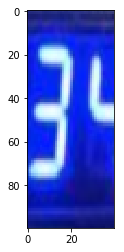

In [22]:
plt.imshow(roi[:,135:175])

In [28]:
def detect_weight(image):
#     image = imutils.resize(image, height=500)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    roi = detect_weight_region(image)
    
#     print(roi)
    plt.imshow(roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
    weight_image = roi.copy()
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    lower_hsv = np.array([50, 68, 185])
    higher_hsv = np.array([126, 124, 255])
    # Apply the cv2.inrange method to create a mask
    mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
    plt.imshow(mask, cmap= 'gray')
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    digitCnts = []
    plt.imshow(mask)
    for c in cnts:
        # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
        # if the contour is sufficiently large, it must be a digit
        if w >= 15 :
            digitCnts.append((x,y,w,h))
    print(digitCnts)
#     digitCnts = sorted(digitCnts)

#     final_digit_contour = []
#     i = 0
#     while(i<len(digitCnts)-1):
#         if(abs(digitCnts[i][0]- digitCnts[i+1][0])<10):
# #             print("aaya")
#             #matlab dono same portioan ke hai
#             x1_1,y1_1,x1_2,y1_2 = digitCnts[i][0],digitCnts[i][1], digitCnts[i][0]+digitCnts[i][2], digitCnts[i][1]+digitCnts[i][3]
#             x2_1,y2_1, x2_2,y2_2 = digitCnts[i+1][0],digitCnts[i+1][1], digitCnts[i+1][0]+digitCnts[i+1][2], digitCnts[i+1][1]+digitCnts[i+1][3]
#             new_value = [min(x1_1,x2_1), min(y1_1,y2_1), max(x1_2,x2_2), max(y1_2,y2_2)]
#     #         if(digitCnts[i][1]<digitCnts[i+1][1]):
#     #             new_value = (min(digitCnts[i][0],digitCnts[i+1][0]), min(digitCnts[i][1],digitCnts[i+1][1], max(digitCnts[i][2],digitCnts[i+1] )
#     #         else:
#     #             new_value = (digitCnts[i][0], digitCnts[i+1][1], digitCnts[i][2], digitCnts[i][3]+digitCnts[i+1][3])
#             new_value[2] = new_value[2] - new_value[0]
#             new_value[3] = new_value[3] -  new_value[1]
#             final_digit_contour.append(new_value)
# #             print(i, final_digit_contour)
#             i+=2
#         else:
# #             print("nahi aaya")
#             final_digit_contour.append(digitCnts[i])
#             print(i, final_digit_contour)
#             if(i==len(digitCnts)-2):
#                 final_digit_contour.append(digitCnts[i+1])
#                 print(i,final_digit_contour)
#             i+=1
            
#     necessary_digit_region = []
#     for (x,y,w,h ) in final_digit_contour:
#         digit_region = roi[y:y+h, x:x+w]
#         necessary_digit_region.append(digit_region)
#         print(x,y,w,h)
#         roi = cv2.rectangle(roi, (x,y), (x+w,y+h), (255, 0,0), 2)
#         plt.imshow(roi)
        
#     output = weight_image.copy()
#     print(final_digit_contour)
# #     plt.imshow(mask)
# #     plt.imshow(necessary_digit_region[0])
#     weight = get_digits(necessary_digit_region) 
    
#     return weight

	roi: 99.94% bbox.left = 0.30, bbox.top = 0.86, bbox.width = 0.34, bbox.height = 0.12
	roi: 7.06% bbox.left = 0.09, bbox.top = 0.84, bbox.width = 0.60, bbox.height = 0.16
	roi: 2.13% bbox.left = 0.22, bbox.top = 0.84, bbox.width = 0.71, bbox.height = 0.16
	roi: 1.78% bbox.left = 0.98, bbox.top = 0.97, bbox.width = 0.02, bbox.height = 0.03
	roi: 1.50% bbox.left = 0.73, bbox.top = 0.95, bbox.width = 0.27, bbox.height = 0.05
	roi: 1.26% bbox.left = 0.98, bbox.top = 0.98, bbox.width = 0.02, bbox.height = 0.02
[]


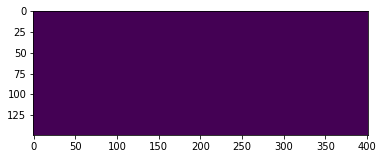

In [29]:
image = cv2.imread("detect_weight_region.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
weight = detect_weight(image)

	roi: 99.95% bbox.left = 0.39, bbox.top = 0.70, bbox.width = 0.19, bbox.height = 0.09
[]
[]
0.0


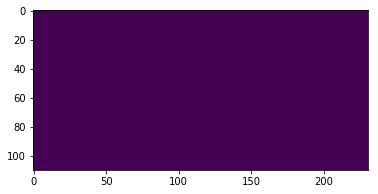

In [26]:
image = cv2.imread("predicion5.jpeg")
print(detect_weight(image))
# plt.imshow(roi)
# print(roi.shape)

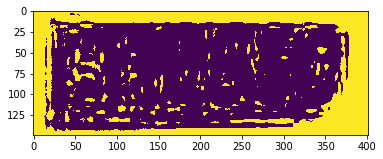

In [8]:
for i in range(6):
    x= 

lower_color = np.array([a1,a2,a3])
upper_color = np.array([b1,b2,b3])


In [ ]:
cv2.destroyAllWindows()